In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings 
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_columns = None
pd.options.display.max_rows = None
np.random.seed(100)


In [3]:
day = pd.read_csv('day.csv')
hour = pd.read_csv('hour.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.34417,0.36362,0.80583,0.16045,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.36348,0.35374,0.69609,0.24854,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.19636,0.18940,0.43727,0.24831,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.20000,0.21212,0.59044,0.16030,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.22696,0.22927,0.43696,0.18690,82,1518,1600


In [4]:
day['temp'] = day['temp']*41
hour['temp'] = hour['temp']*41

day['atemp'] = day['atemp']*50
hour['atemp'] = hour['atemp']*50

day['hum'] = day['hum']*100
hour['hum'] = hour['hum']*100

day['windspeed'] = day['windspeed']*67
hour['windspeed'] = hour['windspeed']*67
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,14.11085,18.18125,80.58330,10.74988,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,14.90260,17.68695,69.60870,16.65211,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,8.05092,9.47025,43.72730,16.63670,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,8.20000,10.60610,59.04350,10.73983,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,9.30524,11.46350,43.69570,12.52230,82,1518,1600


In [5]:
day.isna().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

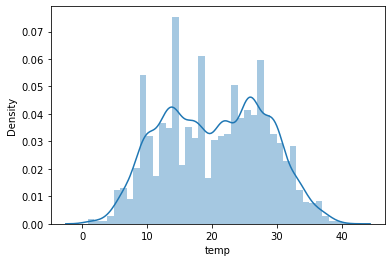

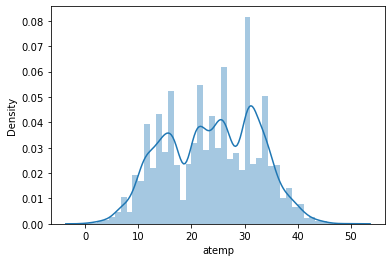

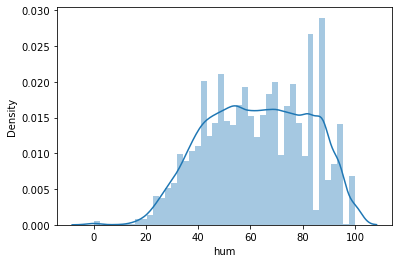

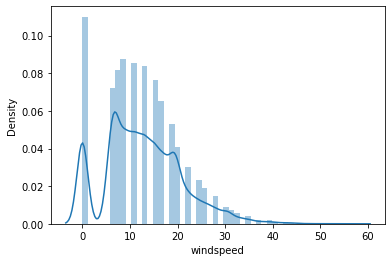

In [10]:
for i in day.select_dtypes(include='float'):
    sns.distplot(hour[i])
    plt.show()

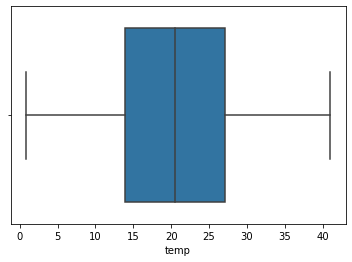

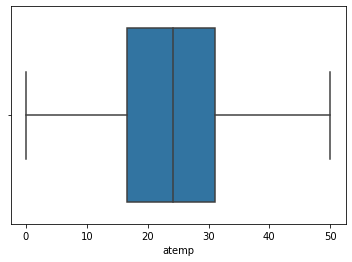

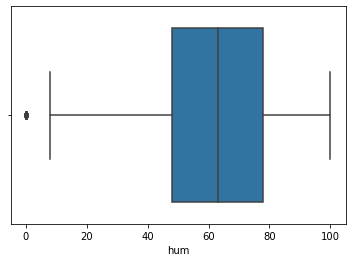

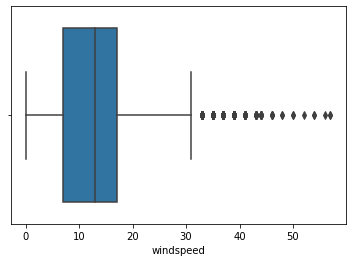

In [11]:
for i in day.select_dtypes(include='float'):
    sns.boxplot(hour[i])
    plt.show()

<AxesSubplot:>

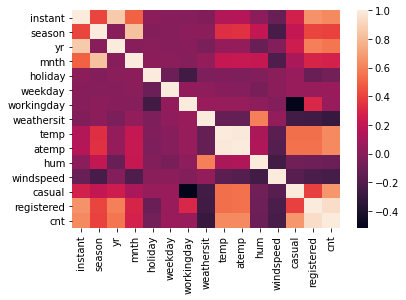

In [14]:
sns.heatmap(day.corr())

In [20]:
def get_df_name(df):
    name = [x for x in globals() if globals()[x] is df][0]
    return name

In [21]:


def plot_stack_bar_chart(data, col, name):
    plt.figure(figsize = (12,8))
    
    p1 = plt.bar(data[col].unique(),data.groupby([col])['casual'].sum())
    p2 = plt.bar(data[col].unique(),data.groupby([col])['registered'].sum(),bottom = data.groupby([col])['casual'].sum())
    
    plt.ylabel('Count')
    plt.title('Count by Casual and Registered for each {} in {} Data'.format(col, get_df_name(data)))
    plt.xticks(data[col].unique(),name)
    plt.legend((p1[0], p2[0]), ('Casual', 'Registered'))
    plt.show()
    

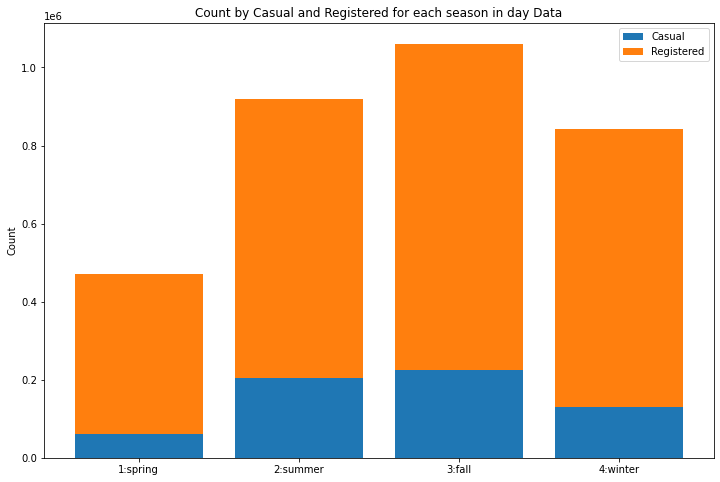

In [23]:
plot_stack_bar_chart(day,'season',('1:spring','2:summer','3:fall','4:winter'))

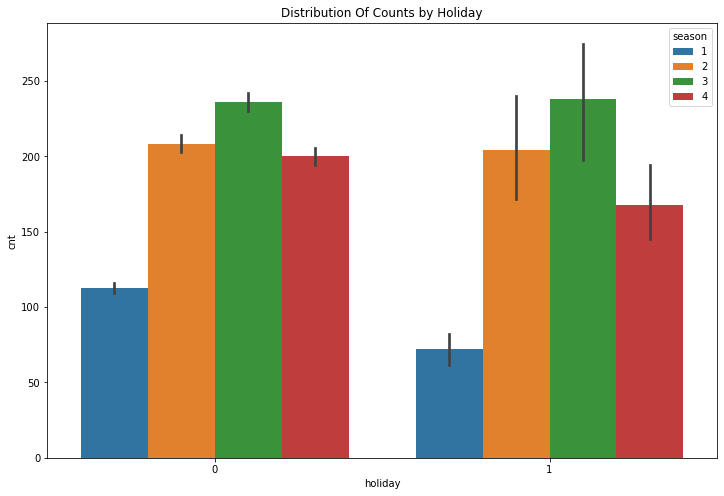

In [27]:
plt.figure(figsize=(12,8))
sns.barplot(x = hour['holiday'], y= hour['cnt'],hue = hour['season'])
plt.title('Distribution Of Counts by Holiday')
plt.show()